In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
def detect_outliers(data, threshold=0.05):

    # Veri dizisi için Gaussian Kernel Yoğunluk Tahmini oluşturma
    kde = gaussian_kde(data)

    # Veri noktalarının yoğunluk tahmini değerleri
    densities = kde.evaluate(data)

    # Yoğunluk tahminlerinin tersine çevrilmesi (düşük yoğunluk = yüksek aykırılık olasılığı)
    density_threshold = np.percentile(densities, threshold * 100)

    # Aykırı değerlerin indekslerini bulma
    outliers_indices = np.where(densities < density_threshold)[0]

    return outliers_indices


In [3]:
def replace_outliers_with_mean(data, outliers_indices):

    mean_value = np.mean(data)
    data_copy = data.copy()
    data_copy[outliers_indices] = mean_value
    return data_copy

In [4]:
# Veri oluşturma
normal_data = np.random.normal(loc=0, scale=1, size=180)
normal_data

array([ 1.51111547,  1.59255468, -0.47158001, -0.64367422,  0.25160538,
        0.46500859,  0.53906993,  0.10423067, -1.25579847, -0.36757273,
        1.94112982, -0.71579722, -0.05806349,  2.12328156, -0.39112298,
        2.21147679, -0.87573936,  1.09731042, -1.27080276,  1.05761568,
        0.35559333,  0.58895659, -0.9061339 , -0.68911795, -0.16226447,
       -0.3769696 , -1.10574236, -0.63438809, -0.23292684,  0.17472542,
       -0.50859089, -0.201739  , -0.09328192, -2.05207066, -1.7425763 ,
        0.08463613,  0.89331106,  0.0201406 , -1.23844251,  0.63905833,
        1.06343184, -0.27714269,  0.90520416,  1.71726106, -0.2275403 ,
       -0.2237634 , -0.51822266, -0.41374645, -0.74850262, -0.27382728,
        0.60712878,  0.33181797,  1.28937994,  0.73957954,  0.26560555,
       -0.39571591, -0.08747842, -1.4934492 ,  0.8868107 ,  0.38416711,
        0.16007746, -0.24406115, -0.94524419,  1.58448016, -2.13598869,
        0.41578713,  1.03114896,  0.03630026, -0.77036222,  2.88

In [5]:
outliers = np.random.normal(loc=10, scale=5, size=20)
outliers

array([13.31094251,  6.15279297, 15.38859399, 13.67871574,  7.32594801,
       10.75971631,  7.82838734, 15.20759644,  4.42438923,  9.53986887,
        5.14590483, 10.85484077, 14.50199948, 11.498834  ,  9.54406027,
        7.72064862, 19.8538905 ,  8.50554191,  9.87356289,  7.86516369])

In [6]:
data = np.concatenate([normal_data, outliers])
data

array([ 1.51111547,  1.59255468, -0.47158001, -0.64367422,  0.25160538,
        0.46500859,  0.53906993,  0.10423067, -1.25579847, -0.36757273,
        1.94112982, -0.71579722, -0.05806349,  2.12328156, -0.39112298,
        2.21147679, -0.87573936,  1.09731042, -1.27080276,  1.05761568,
        0.35559333,  0.58895659, -0.9061339 , -0.68911795, -0.16226447,
       -0.3769696 , -1.10574236, -0.63438809, -0.23292684,  0.17472542,
       -0.50859089, -0.201739  , -0.09328192, -2.05207066, -1.7425763 ,
        0.08463613,  0.89331106,  0.0201406 , -1.23844251,  0.63905833,
        1.06343184, -0.27714269,  0.90520416,  1.71726106, -0.2275403 ,
       -0.2237634 , -0.51822266, -0.41374645, -0.74850262, -0.27382728,
        0.60712878,  0.33181797,  1.28937994,  0.73957954,  0.26560555,
       -0.39571591, -0.08747842, -1.4934492 ,  0.8868107 ,  0.38416711,
        0.16007746, -0.24406115, -0.94524419,  1.58448016, -2.13598869,
        0.41578713,  1.03114896,  0.03630026, -0.77036222,  2.88

In [7]:
# Veri işlem öncesi istatistikleri
mean_before = np.mean(data)
std_dev_before = np.std(data)
median_before = np.median(data)
variance_before = np.var(data)


# Sonuçları yazdırma
print("Veri İşlem Öncesi İstatistikler:")
print("Ortalama (Before):", mean_before)
print("Standart Sapma (Before):", std_dev_before)
print("Median (Before):", median_before)
print("Varyans (Before):", variance_before)

Veri İşlem Öncesi İstatistikler:
Ortalama (Before): 1.1143149955900338
Standart Sapma (Before): 3.45244849926193
Median (Before): 0.17217779516122705
Varyans (Before): 11.919400640055953


In [8]:
# Aykırı değerleri bulma
outliers_indices = detect_outliers(data)
print(outliers_indices)

print("Gaussian KDE ile Tespit Edilen Aykırı Değer Sayısı (Before):", len(outliers_indices))


[180 181 182 183 187 188 190 192 193 196]
Gaussian KDE ile Tespit Edilen Aykırı Değer Sayısı (Before): 10


In [9]:
# Boxplot ile aykırı değer sayısını hesaplama
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_boxplot = np.where((data < lower_bound) | (data > upper_bound))[0]
print(outliers_boxplot)

print("Boxplot ile Tespit Edilen Aykırı Değer Sayısı (Before):", len(outliers_boxplot))

[180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
Boxplot ile Tespit Edilen Aykırı Değer Sayısı (Before): 20


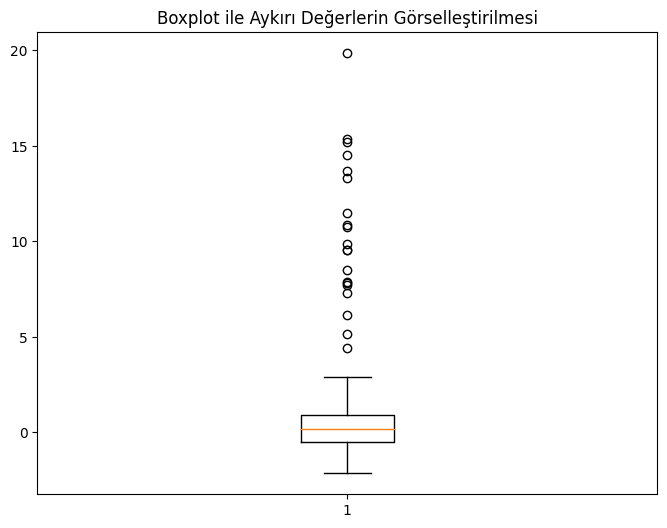

In [10]:
# Boxplot ile aykırı değerleri görselleştirme
plt.figure(figsize=(8, 6))
plt.boxplot(data)
plt.title("Boxplot ile Aykırı Değerlerin Görselleştirilmesi")
plt.show()

In [13]:
# Aykırı değerleri ortalama ile değiştirme
data_with_mean_replacement = replace_outliers_with_mean(data, outliers_indices)

print("Aykırı Değerlerin İndeksleri ve Değerleri (Önce):")
for index in outliers_indices:
    print(f"İndeks: {index}, Değer: {data[index]}")

print("\nAykırı Değerlerin İndeksleri ve Değerleri (Sonra - Ortalama İle Değiştirildi):")
for index in outliers_indices:
    print(f"İndeks: {index}, Değer: {data_with_mean_replacement[index]}")

Aykırı Değerlerin İndeksleri ve Değerleri (Önce):
İndeks: 180, Değer: 13.310942512526374
İndeks: 181, Değer: 6.1527929721378545
İndeks: 182, Değer: 15.388593985175557
İndeks: 183, Değer: 13.678715742774987
İndeks: 187, Değer: 15.20759643616628
İndeks: 188, Değer: 4.424389233315472
İndeks: 190, Değer: 5.145904826279111
İndeks: 192, Değer: 14.501999480982544
İndeks: 193, Değer: 11.498833999198975
İndeks: 196, Değer: 19.853890497041956

Aykırı Değerlerin İndeksleri ve Değerleri (Sonra - Ortalama İle Değiştirildi):
İndeks: 180, Değer: 1.1143149955900338
İndeks: 181, Değer: 1.1143149955900338
İndeks: 182, Değer: 1.1143149955900338
İndeks: 183, Değer: 1.1143149955900338
İndeks: 187, Değer: 1.1143149955900338
İndeks: 188, Değer: 1.1143149955900338
İndeks: 190, Değer: 1.1143149955900338
İndeks: 192, Değer: 1.1143149955900338
İndeks: 193, Değer: 1.1143149955900338
İndeks: 196, Değer: 1.1143149955900338


In [12]:
# Veri işlem sonrası istatistikleri
mean_after = np.mean(data_with_mean_replacement)
std_dev_after = np.std(data_with_mean_replacement)
median_after = np.median(data_with_mean_replacement)
variance_after = np.var(data_with_mean_replacement)


print("Veri İşlem Sonrası İstatistikler:")
print("Ortalama (After):", mean_after)
print("Standart Sapma (After):", std_dev_after)
print("Median (After):", median_after)
print("Varyans (After):", variance_after)

Veri İşlem Sonrası İstatistikler:
Ortalama (After): 0.5742124469415398
Standart Sapma (After): 2.1513993991209865
Median (After): 0.17217779516122705
Varyans (After): 4.6285193745381426
